<a href="https://colab.research.google.com/github/MANJESHKUMARCHAUHAN/-Diwali-Sales-Prediction/blob/main/AI_Uninformed_Search_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

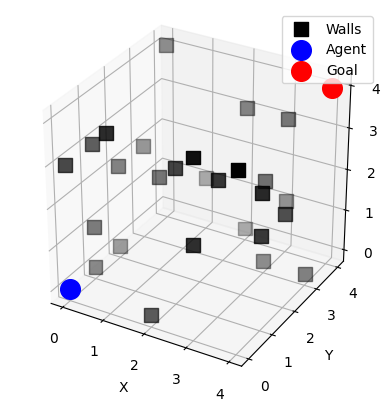

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

class MazeWorld3D:
    def __init__(self, width=5, height=5, depth=5):
        self.width = width
        self.height = height
        self.depth = depth
        self.maze = np.zeros((width, height, depth))
        self.agent_position = [0, 0, 0]
        self.goal_position = [width - 1, height - 1, depth - 1]
        self.create_walls()

    def create_walls(self, density=0.2):
        for x in range(self.width):
            for y in range(self.height):
                for z in range(self.depth):
                    if random.random() < density and [x, y, z] != self.agent_position and [x, y, z] != self.goal_position:
                        self.maze[x, y, z] = 1  # 1 represents a wall

    def display(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_box_aspect([self.width, self.height, self.depth])

        # Plot walls
        wall_x, wall_y, wall_z = np.where(self.maze == 1)
        ax.scatter(wall_x, wall_y, wall_z, c='black', marker='s', s=100, label='Walls')

        # Plot agent
        ax.scatter(*self.agent_position, c='blue', s=200, label='Agent')

        # Plot goal
        ax.scatter(*self.goal_position, c='red', s=200, label='Goal')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.legend()
        plt.show()

    def move_agent(self, direction):
        x, y, z = self.agent_position
        if direction == 'up' and x > 0 and self.maze[x - 1, y, z] != 1:
            self.agent_position = [x - 1, y, z]
        elif direction == 'down' and x < self.width - 1 and self.maze[x + 1, y, z] != 1:
            self.agent_position = [x + 1, y, z]
        elif direction == 'left' and y > 0 and self.maze[x, y - 1, z] != 1:
            self.agent_position = [x, y - 1, z]
        elif direction == 'right' and y < self.height - 1 and self.maze[x, y + 1, z] != 1:
            self.agent_position = [x, y + 1, z]
        elif direction == 'forward' and z < self.depth - 1 and self.maze[x, y, z + 1] != 1:
            self.agent_position = [x, y, z + 1]
        elif direction == 'backward' and z > 0 and self.maze[x, y, z - 1] != 1:
            self.agent_position = [x, y, z - 1]

    def is_goal_reached(self):
        return self.agent_position == self.goal_position

# Running the 3D Maze
maze_world = MazeWorld3D()

while not maze_world.is_goal_reached():
    maze_world.display()
    move = input("Enter move (up/down/left/right/forward/backward): ").strip().lower()
    maze_world.move_agent(move)

print("Goal reached!")


In [ ]:
# BFS:-


from collections import deque

class MazeWorld3D:
    def bfs(self):
        queue = deque([self.agent_position])
        visited = set()
        visited.add(tuple(self.agent_position))
        parent = {tuple(self.agent_position): None}

        directions = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]

        while queue:
            current_pos = queue.popleft()
            if current_pos == self.goal_position:
                return self.reconstruct_path(parent)

            for direction in directions:
                next_pos = [current_pos[i] + direction[i] for i in range(3)]
                if self.is_valid_move(next_pos) and tuple(next_pos) not in visited:
                    queue.append(next_pos)
                    visited.add(tuple(next_pos))
                    parent[tuple(next_pos)] = tuple(current_pos)

        return None

    def is_valid_move(self, position):
        x, y, z = position
        return (0 <= x < self.width and 0 <= y < self.height and 0 <= z < self.depth and
                self.maze[x, y, z] == 0)

    def reconstruct_path(self, parent):
        path = []
        current_pos = tuple(self.goal_position)
        while current_pos is not None:
            path.append(current_pos)
            current_pos = parent[current_pos]
        return path[::-1]

# Running BFS on the 3D Maze
maze_world = MazeWorld3D()
path = maze_world.bfs()

if path:
    print("Path found:")
    for step in path:
        print(step)
else:
    print("No path found!")


In [ ]:
# DFS:-
class MazeWorld3D:
    def dfs(self):
        stack = [self.agent_position]
        visited = set()
        visited.add(tuple(self.agent_position))
        parent = {tuple(self.agent_position): None}

        directions = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]

        while stack:
            current_pos = stack.pop()
            if current_pos == self.goal_position:
                return self.reconstruct_path(parent)

            for direction in directions:
                next_pos = [current_pos[i] + direction[i] for i in range(3)]
                if self.is_valid_move(next_pos) and tuple(next_pos) not in visited:
                    stack.append(next_pos)
                    visited.add(tuple(next_pos))
                    parent[tuple(next_pos)] = tuple(current_pos)

        return None

# Running DFS on the 3D Maze
maze_world = MazeWorld3D()
path = maze_world.dfs()

if path:
    print("Path found:")
    for step in path:
        print(step)
else:
    print("No path found!")
